Predicting wind speed using LSTM and single time step.

https://www.kaggle.com/berkerisen/wind-turbine-scada-dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf

In [3]:
from sklearn.metrics import mean_squared_error , r2_score

In [4]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [5]:
train.head()

,Date,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
0,2018-01-01 00:00:00,380.047791,5.311336,416.328908,259.994904
1,2018-01-01 00:10:00,453.769196,5.672167,519.917511,268.641113
2,2018-01-01 00:20:00,306.376587,5.216037,390.900016,272.564789
3,2018-01-01 00:30:00,419.645905,5.659674,516.127569,271.258087
4,2018-01-01 00:40:00,380.650696,5.577941,491.702972,265.674286


In [6]:
test.head()

,Date,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
0,2018-12-26 00:00:00,394.483887,11.23912,3350.492384,25.707260
1,2018-12-26 00:10:00,369.472809,11.01617,3278.121125,25.653749
2,2018-12-26 00:20:00,342.465393,10.68914,3151.278731,26.026560
3,2018-12-26 00:30:00,379.872101,10.95354,3255.790569,25.367300
4,2018-12-26 00:40:00,346.712891,10.38256,3007.924280,24.966379


In [7]:
train['Date'] = pd.to_datetime(train['Date'])
test['Date'] = pd.to_datetime(test['Date'])

In [10]:
cols = train.columns.tolist()

In [13]:
train.set_index(['Date'] , inplace = True)
test.set_index(['Date'] , inplace = True)

Text(0.5, 1.0, 'Wind Speed (m/s)')

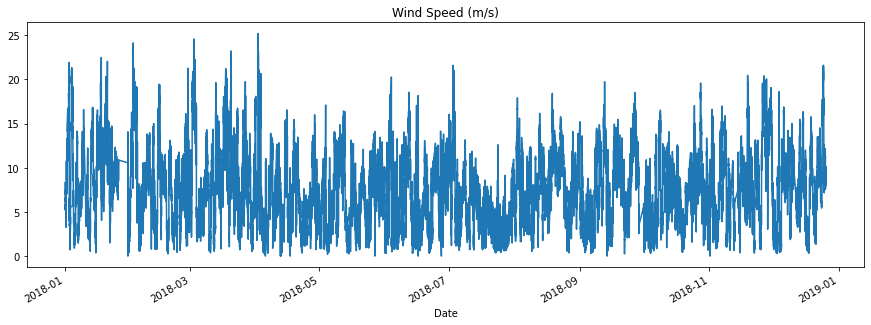

In [24]:
## plot wind speed 
plt.figure(figsize = (15,5))
train[cols[2]].plot()
plt.title(cols[2])

Text(0.5, 1.0, 'Wind Speed (m/s)')

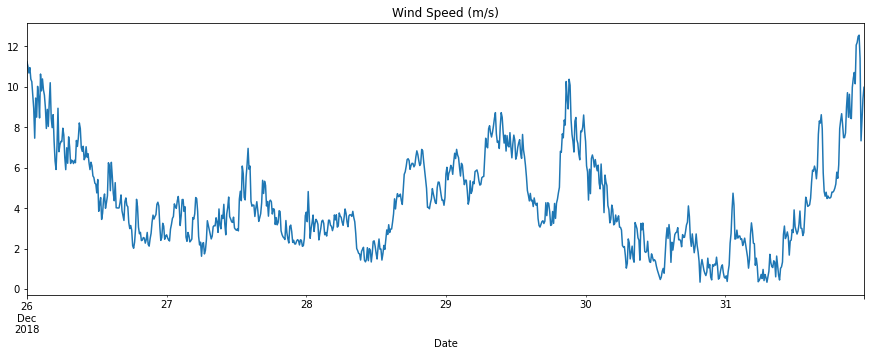

In [25]:
## plot test data 
plt.figure(figsize = (15,5))
test[cols[2]].plot()
plt.title(cols[2])

In [26]:
## Shift the wind speed values by 1 
train[cols[2] + '+1'] = train[cols[2]].shift(-1)

In [27]:
train.head()

,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°),month,hour,Wind Speed (m/s)+1
Date,,,,,,,
2018-01-01 00:00:00,380.047791,5.311336,416.328908,259.994904,1,0,5.672167
2018-01-01 00:10:00,453.769196,5.672167,519.917511,268.641113,1,0,5.216037
2018-01-01 00:20:00,306.376587,5.216037,390.900016,272.564789,1,0,5.659674
2018-01-01 00:30:00,419.645905,5.659674,516.127569,271.258087,1,0,5.577941
2018-01-01 00:40:00,380.650696,5.577941,491.702972,265.674286,1,0,5.604052


In [28]:
train.isnull().sum()

LV ActivePower (kW)              0
Wind Speed (m/s)                 0
Theoretical_Power_Curve (KWh)    0
Wind Direction (°)               0
month                            0
hour                             0
Wind Speed (m/s)+1               1
dtype: int64

In [29]:
train.tail()

,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°),month,hour,Wind Speed (m/s)+1
Date,,,,,,,
2018-12-25 23:10:00,215.484207,9.242176,2301.134108,30.515120,12,23,8.737427
2018-12-25 23:20:00,190.253998,8.737427,1976.292032,26.657761,12,23,9.707693
2018-12-25 23:30:00,261.101013,9.707693,2596.541416,25.608040,12,23,9.075032
2018-12-25 23:40:00,212.121506,9.075032,2192.469413,26.380341,12,23,10.106640
2018-12-25 23:50:00,296.951111,10.106640,2856.644995,25.966070,12,23,NaN


In [30]:
## Shift the wind speed values by 1 
test[cols[2] + '+1'] = test[cols[2]].shift(-1)

In [31]:
test.head()

,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°),month,hour,Wind Speed (m/s)+1
Date,,,,,,,
2018-12-26 00:00:00,394.483887,11.23912,3350.492384,25.707260,12,0,11.01617
2018-12-26 00:10:00,369.472809,11.01617,3278.121125,25.653749,12,0,10.68914
2018-12-26 00:20:00,342.465393,10.68914,3151.278731,26.026560,12,0,10.95354
2018-12-26 00:30:00,379.872101,10.95354,3255.790569,25.367300,12,0,10.38256
2018-12-26 00:40:00,346.712891,10.38256,3007.924280,24.966379,12,0,10.26015


In [32]:
test.tail()

,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°),month,hour,Wind Speed (m/s)+1
Date,,,,,,,
2018-12-31 23:10:00,2963.980957,11.404030,3397.190793,80.502724,12,23,7.332648
2018-12-31 23:20:00,1684.353027,7.332648,1173.055771,84.062599,12,23,8.435358
2018-12-31 23:30:00,2201.106934,8.435358,1788.284755,84.742500,12,23,9.421366
2018-12-31 23:40:00,2515.694092,9.421366,2418.382503,84.297913,12,23,9.979332
2018-12-31 23:50:00,2820.466064,9.979332,2779.184096,82.274620,12,23,NaN


In [36]:
## Set the features
trainX = train[cols[2]][:-1].values
testX = test[cols[2]][:-1].values

In [34]:
## set the response/predictor
trainY = train[cols[2]+ '+1'][:-1].values
testY = test[cols[2]+'+1'][:-1].values

In [37]:
trainX.shape , trainY.shape , testX.shape , testY.shape

((49665,), (49665,), (863,), (863,))

In [38]:
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (len(trainX), 1, 1))
testX = np.reshape(testX, (len(testX), 1, 1))


In [39]:
# create and fit the LSTM network
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.LSTM(4, input_shape=(1, 1)))
model.add(tf.keras.layers.Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=50, batch_size=1, verbose=2)

Epoch 1/50
49665/49665 - 50s - loss: 2.5266
Epoch 2/50
49665/49665 - 50s - loss: 0.6099
Epoch 3/50
49665/49665 - 49s - loss: 0.6030
Epoch 4/50
49665/49665 - 49s - loss: 0.5989
Epoch 5/50
49665/49665 - 51s - loss: 0.5982
Epoch 6/50
49665/49665 - 50s - loss: 0.5958
Epoch 7/50
49665/49665 - 50s - loss: 0.5945
Epoch 8/50
49665/49665 - 50s - loss: 0.5924
Epoch 9/50
49665/49665 - 50s - loss: 0.5905
Epoch 10/50
49665/49665 - 51s - loss: 0.5897
Epoch 11/50
49665/49665 - 50s - loss: 0.5896
Epoch 12/50
49665/49665 - 50s - loss: 0.5873
Epoch 13/50
49665/49665 - 49s - loss: 0.5863
Epoch 14/50
49665/49665 - 49s - loss: 0.5862
Epoch 15/50
49665/49665 - 49s - loss: 0.5841
Epoch 16/50
49665/49665 - 49s - loss: 0.5849
Epoch 17/50
49665/49665 - 49s - loss: 0.5849
Epoch 18/50
49665/49665 - 49s - loss: 0.5864
Epoch 19/50
49665/49665 - 49s - loss: 0.5840
Epoch 20/50
49665/49665 - 49s - loss: 0.5816
Epoch 21/50
49665/49665 - 49s - loss: 0.5822
Epoch 22/50
49665/49665 - 49s - loss: 0.5833
Epoch 23/50
49665/4

In [40]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

In [41]:
# calculate root mean squared error
trainScore = np.sqrt(mean_squared_error(trainY, trainPredict))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(testY, testPredict))
print('Test Score: %.2f RMSE' % (testScore))
print("R2 score :{}".format(r2_score(testY, testPredict)))

Train Score: 0.76 RMSE
Test Score: 0.63 RMSE
R2 score :0.9292844619537952


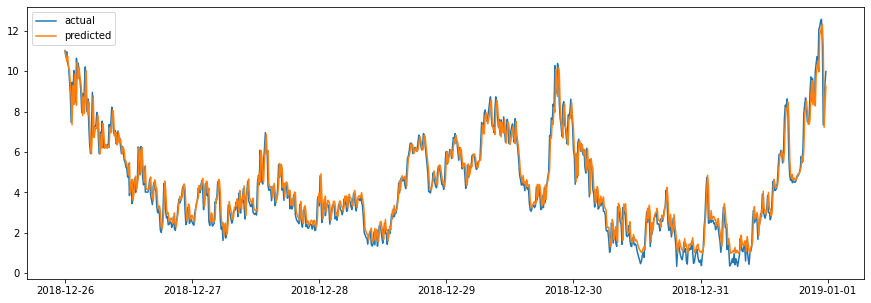

In [43]:
plt.figure(figsize = (15,5))
## create a df with the required test set dates as index 
result_df = test[cols[2] + '+1'][:-1].reset_index()
result_df['predicted'] = testPredict
result_df.set_index(['Date'], inplace = True)
plt.plot(result_df[cols[2]+ '+1'] , label = 'actual')
plt.plot(result_df['predicted'] , label = 'predicted')
plt.legend()